In [43]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [4]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [5]:
len(X_train)

60000

In [6]:
len(X_test)

10000

In [7]:
X_train[0].shape

(28, 28)

In [9]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

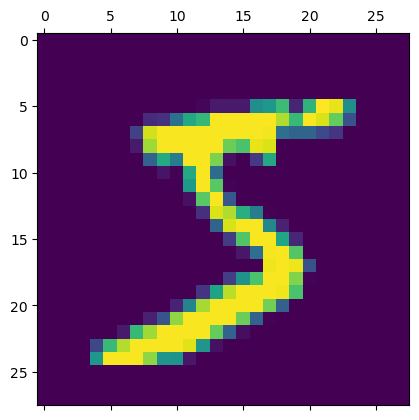

In [10]:
plt.matshow(X_train[0])

In [11]:
y_train[0]

np.uint8(5)

In [12]:
y_train[:8]

array([5, 0, 4, 1, 9, 2, 1, 3], dtype=uint8)

In [14]:
X_train.shape

(60000, 28, 28)

#### In the above we saw that we have 6000 train images each with 28 by 28

### Scaling the flatten array

In [23]:
X_train = X_train/255
X_test = X_test/255

### Reshaping or Flattening the image

In [29]:
X_train_flatten = X_train.reshape(len(X_train),28*28)
X_test_flatten = X_test.reshape(len(X_test),28*28)

In [25]:
X_train_flatten

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(60000, 784))

#### we flattend 6000 training images into 784 by 1

### NN layer building , training the NN

In [28]:
model = keras.Sequential([
    keras.layers.Dense(units=10,input_shape=[784],activation ='sigmoid')
    
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
             )

model.fit(X_train_flatten,y_train,epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.5871 - loss: 2.1880
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7049 - loss: 1.9770
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7395 - loss: 1.7904
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7599 - loss: 1.6265
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7749 - loss: 1.4837


### Model Evaluation

In [30]:
prediction = model.predict(X_test_flatten)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step


In [31]:
prediction[0]

array([8.7858327e-02, 1.2683323e-06, 1.9229753e-02, 1.2012366e-01,
       7.1860045e-02, 8.2738390e-03, 2.2195750e-04, 9.9998951e-01,
       3.3505130e-01, 9.6284640e-01], dtype=float32)

7


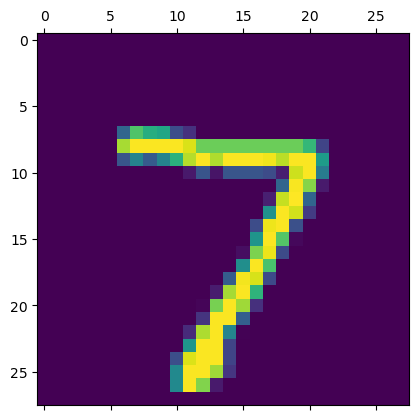

In [34]:
plt.matshow(X_test[0])
print(np.argmax(prediction[0]))


In [38]:
y_predicted_labels = [np.argmax(i) for i in prediction]
print(y_predicted_labels[:5])

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]


In [40]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [41]:
cm = tf.math.confusion_matrix(labels = y_test,predictions=y_predicted_labels )
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[960,   0,   1,   2,   0,   0,   5,   1,  11,   0],
       [  0, 742,   3,   5,   0,   0,   6,   0, 379,   0],
       [ 65,   0, 797,  23,   4,   0,  38,   2, 102,   1],
       [ 32,   0,  29, 842,   0,   0,   9,   2,  87,   9],
       [ 30,   0,  11,   2, 551,   0,  47,   0, 133, 208],
       [230,   0,   9, 169,   1,  85,  15,   3, 359,  21],
       [ 84,   1,  17,   1,   2,   0, 814,   0,  39,   0],
       [ 28,   2,  25,   7,   5,   0,   3, 755, 128,  75],
       [ 37,   0,   6,  47,   1,   0,   9,   3, 864,   7],
       [ 56,   0,  15,  10,   9,   0,   1,   6, 115, 797]], dtype=int32)>

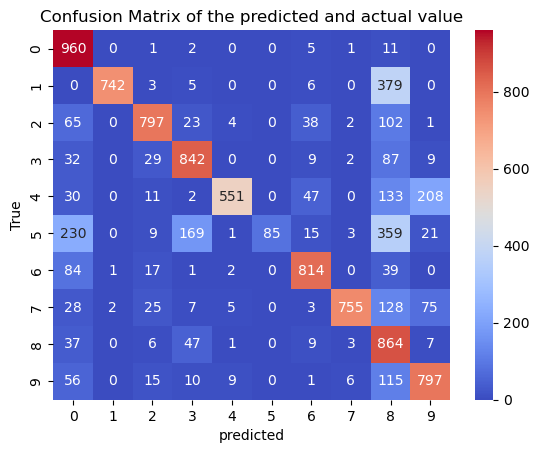

In [49]:
sns.heatmap(cm , annot=True,cmap='coolwarm',fmt='d')
plt.title("Confusion Matrix of the predicted and actual value")
plt.xlabel("predicted")
plt.ylabel("True")
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1408 - loss: 3.0804


[3.0804319381713867, 0.14079999923706055]

### Using softmax activation function

In [59]:
model3 = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    keras.layers.Dense(10, activation='softmax')
])


model3.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
             )

model3.fit(X_train_flatten,y_train,epochs = 5)



Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step - accuracy: 0.7120 - loss: 1.1933
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8748 - loss: 0.4899
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8946 - loss: 0.3843
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9032 - loss: 0.3430
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9093 - loss: 0.3191


In [60]:
model3.evaluate(X_test_flatten,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8189 - loss: 2.4210


[2.4210128784179688, 0.8188999891281128]